# Prediction (out of sample)

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

## Artificial data

In [3]:
nsample = 50
sig = 0.25
x1 = np.linspace(0, 20, nsample)
X = np.column_stack((x1, np.sin(x1), (x1 - 5) ** 2))
X = sm.add_constant(X)
beta = [5.0, 0.5, 0.5, -0.02]
y_true = np.dot(X, beta)
y = y_true + sig * np.random.normal(size=nsample)

## Estimation 

In [4]:
olsmod = sm.OLS(y, X)
olsres = olsmod.fit()
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     704.2
Date:                Tue, 13 Jan 2026   Prob (F-statistic):           1.96e-38
Time:                        23:44:26   Log-Likelihood:                -5.8313
No. Observations:                  50   AIC:                             19.66
Df Residuals:                      46   BIC:                             27.31
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9996      0.097     51.745      0.0

## In-sample prediction

In [5]:
ypred = olsres.predict(X)
print(ypred)

[ 4.50807441  4.97837129  5.41082576  5.77928791  6.0670452   6.26956828
  6.39525513  6.46405134  6.50417307  6.54747122  6.62419844  6.75803868
  6.96221598  7.23732183  7.57121796  7.94103064  8.31690875  8.66692826
  8.96233723  9.18227972  9.31722228  9.37052036  9.35786696  9.30471433
  9.24209225  9.20150989  9.209779    9.28460875  9.43169622  9.64379035
  9.90188328 10.17833329 10.44140624 10.66048944 10.81112118 10.87900976
 10.86238152 10.77227234 10.63071437 10.46711628 10.3134315  10.1989083
 10.14528446 10.16321576 10.25052528 10.39256107 10.56460343 10.73592626
 10.87484529 10.95392372]


## Create a new sample of explanatory variables Xnew, predict and plot

In [6]:
x1n = np.linspace(20.5, 25, 10)
Xnew = np.column_stack((x1n, np.sin(x1n), (x1n - 5) ** 2))
Xnew = sm.add_constant(Xnew)
ynewpred = olsres.predict(Xnew)  # predict out of sample
print(ynewpred)

[10.94282636 10.80479279 10.55863984 10.24724868  9.92706603  9.65428403
  9.47108241  9.39530148  9.41607416  9.49648662]


## Plot comparison

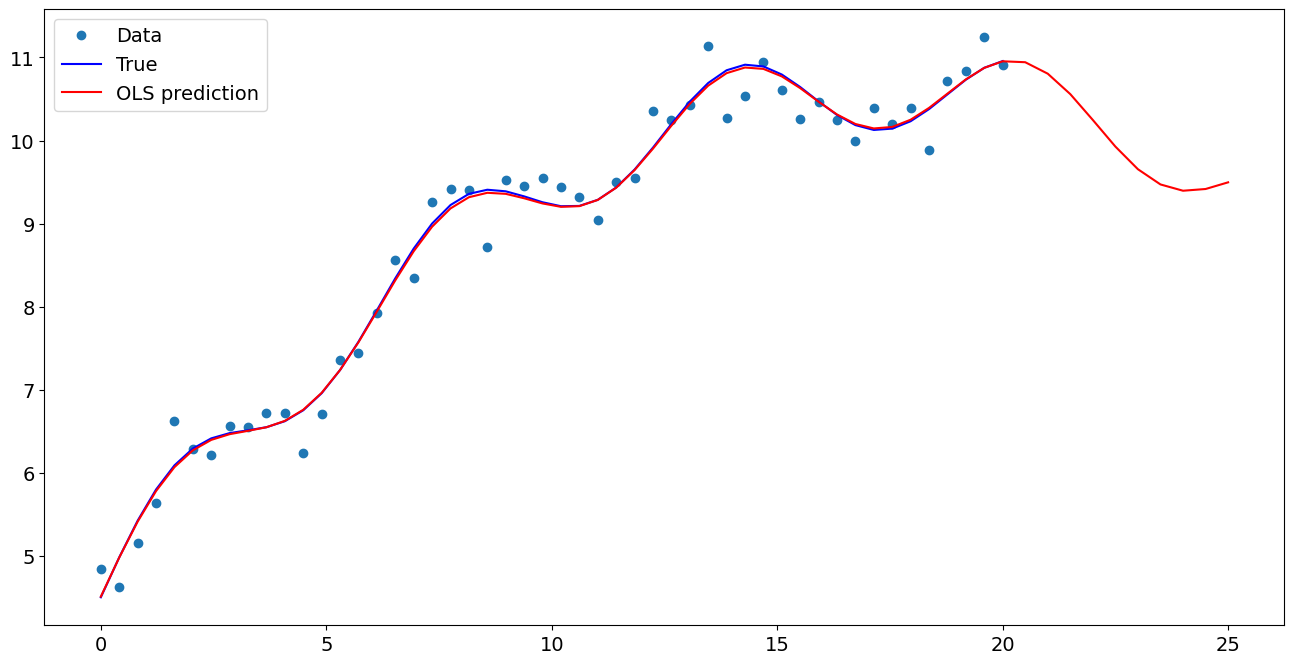

In [7]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x1, y, "o", label="Data")
ax.plot(x1, y_true, "b-", label="True")
ax.plot(np.hstack((x1, x1n)), np.hstack((ypred, ynewpred)), "r", label="OLS prediction")
ax.legend(loc="best")

## Predicting with Formulas

Using formulas can make both estimation and prediction a lot easier

In [8]:
from statsmodels.formula.api import ols

data = {"x1": x1, "y": y}

res = ols("y ~ x1 + np.sin(x1) + I((x1-5)**2)", data=data).fit()

We use the `I` to indicate use of the Identity transform. Ie., we do not want any expansion magic from using `**2`

In [9]:
res.params

Intercept           4.999640
x1                  0.497016
np.sin(x1)          0.479823
I((x1 - 5) ** 2)   -0.019663
dtype: float64

Now we only have to pass the single variable and we get the transformed right-hand side variables automatically

In [10]:
res.predict(exog=dict(x1=x1n))

0    10.942826
1    10.804793
2    10.558640
3    10.247249
4     9.927066
5     9.654284
6     9.471082
7     9.395301
8     9.416074
9     9.496487
dtype: float64